In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
from matplotlib.pyplot import*
import numpy as np
import matplotlib.pyplot as plt
import qiskit.quantum_info as qi

In [2]:
# we define the range for the phase difference, such it can take all of the following values:
n = 50
s = [i * 2 * np.pi / n for i in range(n)]
#s

For $U_+ = CR_y(\theta)$

$\textbf{sz}$

In [3]:
# we can make plots for different values of theta and fixed values of phi:
qasm_simulator = Aer.get_backend('qasm_simulator')
#we define empty lists to use them later to store the statistics of measuring values 00, 01, 10, 11 for different values of theta and phi
p0 = []
p1 = []


theta1 = np.pi/4
q_c = QuantumRegister(1,'q_{c}')
q_p = QuantumRegister(1,'q_{p}')
cr = ClassicalRegister(2)

for theta in s:
    q1 = QuantumCircuit(q_c,q_p,cr)
    q1.ry(2*theta1,q_c[0]) # symmetric beam-splitter
    q1.cry(theta,q_c[0],q_p[0],ctrl_state = 0) # U operator for polarization
    #q1.measure(q_c[0],cr[0])
    q1.measure(q_p[0],cr[1])
    job = execute([q1 for i in range(20)],qasm_simulator,shots = 1000) #implement the simulation
    counts = job.result().get_counts()

    temp1 = [] #will store how many 00 values we have for each value of theta
    temp2 = [] #will store how many 01 values we have for each value of theta
    temp3 = [] #will store how many 10 values we have for each value of theta
    temp4 = [] #will store how many 11 values we have for each value of theta

    for i in range(20):
        temp1.append(counts[i].get('00',0)/1000) #stores how many (relative population) 00 values we have (50 times) for each value of theta 
        temp2.append(counts[i].get('10',1)/1000) #stores how many (relative population) 01 values we have (50 times) for each value of theta
        
    p0.append(sum(temp1)/20) # takes the prob of 00 to occur for all the values of theta
    p1.append(sum(temp2)/20) # takes the prob of 01 to occur for all the values of theta
    #sx.append(sum(temp1)/50-sum(temp2)/50)

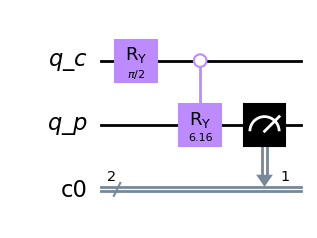

In [4]:
q1.draw('mpl')

In [5]:
sz = []

for i in range(50):
    sz.append(p0[i]-p1[i])  

$\textbf{sx}$

In [6]:
# we can make plots for different values of theta and fixed values of phi:
qasm_simulator = Aer.get_backend('qasm_simulator')
#we define empty lists to use them later to store the statistics of measuring values 00, 01, 10, 11 for different values of theta and phi
p0x = []
p1x = []


theta1 = np.pi/4
q_c = QuantumRegister(1,'q_{c}')
q_p = QuantumRegister(1,'q_{p}')
cr = ClassicalRegister(2)

for theta in s:
    q1 = QuantumCircuit(q_c,q_p,cr)
    q1.ry(2*theta1,q_c[0]) # symmetric beam-splitter
    q1.cry(theta,q_c[0],q_p[0],ctrl_state = 0) # U operator for polarization
    q1.h(q_p[0]) # rotation to x basis
    #q1.measure(q_c[0],cr[0])
    q1.measure(q_p[0],cr[1])
    job = execute([q1 for i in range(20)],qasm_simulator,shots = 1000) #implement the simulation
    counts = job.result().get_counts()

    temp1 = [] #will store how many 00 values we have for each value of theta
    temp2 = [] #will store how many 01 values we have for each value of theta

    for i in range(20):
        temp1.append(counts[i].get('00',0)/1000) #stores how many (relative population) 00 values we have (50 times) for each value of theta 
        temp2.append(counts[i].get('10',1)/1000) #stores how many (relative population) 01 values we have (50 times) for each value of theta
        
    p0x.append(sum(temp1)/20) # takes the prob of 00 to occur for all the values of theta
    p1x.append(sum(temp2)/20) # takes the prob of 01 to occur for all the values of theta


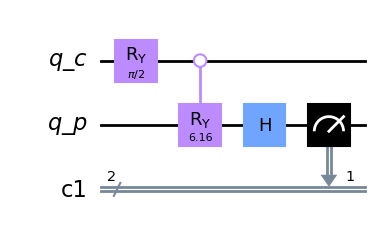

In [7]:
q1.draw('mpl')

In [8]:
sx = []

for i in range(50):
    sx.append(p0x[i]-p1x[i])  

$\textbf{sy}$

In [9]:
# we can make plots for different values of theta and fixed values of phi:
qasm_simulator = Aer.get_backend('qasm_simulator')
#we define empty lists to use them later to store the statistics of measuring values 00, 01, 10, 11 for different values of theta and phi
p0y = []
p1y = []


theta1 = np.pi/4
q_c = QuantumRegister(1,'q_{c}')
q_p = QuantumRegister(1,'q_{p}')
cr = ClassicalRegister(2)

for theta in s:
    q1 = QuantumCircuit(q_c,q_p,cr)
    q1.ry(2*theta1,q_c[0]) # symmetric beam-splitter
    q1.cry(theta,q_c[0],q_p[0],ctrl_state = 0) # U operator for polarization
    q1.sdg(q_p[0]) #phase gate
    q1.h(q_p[0]) # rotation to y basis
    #q1.measure(q_c[0],cr[0])
    q1.measure(q_p[0],cr[1])
    job = execute([q1 for i in range(20)],qasm_simulator,shots = 1000) #implement the simulation
    counts = job.result().get_counts()

    temp1 = [] #will store how many 00 values we have for each value of theta
    temp2 = [] #will store how many 01 values we have for each value of theta

    for i in range(20):
        temp1.append(counts[i].get('00',0)/1000) #stores how many (relative population) 00 values we have (50 times) for each value of theta 
        temp2.append(counts[i].get('10',1)/1000) #stores how many (relative population) 01 values we have (50 times) for each value of theta
        
    p0y.append(sum(temp1)/20) # takes the prob of 00 to occur for all the values of theta
    p1y.append(sum(temp2)/20) # takes the prob of 01 to occur for all the values of theta


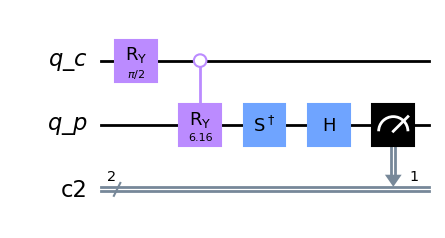

In [10]:
q1.draw('mpl')

In [11]:
sy = []

for i in range(50):
    sy.append(p0y[i]-p1y[i])  

In [12]:
x = np.array([[0,1],
     [1,0]])
y = np.array([[0,-complex(0,1)],
     [complex(0,1),0]])
z = np.array([[1,0],
     [0,-1]])
I = np.array([[1,0],
    [0,1]])

In [13]:
rho_p = []

for i in range(50):
    s1 = np.add(I,sx[i]*x)
    s2 = np.add(sy[i]*y,sz[i]*z)
    s3 = np.add(s1,s2)
    rho_p.append(0.5*s3)

For $U_- = I$

$\textbf{sz}$

In [14]:
# we can make plots for different values of theta and fixed values of phi:
qasm_simulator = Aer.get_backend('qasm_simulator')
#we define empty lists to use them later to store the statistics of measuring values 00, 01, 10, 11 for different values of theta and phi
p0 = []
p1 = []


theta1 = np.pi/4
q_c = QuantumRegister(1,'q_{c}')
q_p = QuantumRegister(1,'q_{p}')
cr = ClassicalRegister(2)

for theta in s:
    q1 = QuantumCircuit(q_c,q_p,cr)
    q1.ry(2*theta1,q_c[0]) # symmetric beam-splitter
    #q1.cry(theta,q_c[0],q_p[0],ctrl_state = 0) # U operator for polarization
    #q1.measure(q_c[0],cr[0])
    q1.measure(q_p[0],cr[1])
    job = execute([q1 for i in range(20)],qasm_simulator,shots = 1000) #implement the simulation
    counts = job.result().get_counts()

    temp1 = [] #will store how many 00 values we have for each value of theta
    temp2 = [] #will store how many 01 values we have for each value of theta
    temp3 = [] #will store how many 10 values we have for each value of theta
    temp4 = [] #will store how many 11 values we have for each value of theta

    for i in range(20):
        temp1.append(counts[i].get('00',0)/1000) #stores how many (relative population) 00 values we have (50 times) for each value of theta 
        temp2.append(counts[i].get('10',1)/1000) #stores how many (relative population) 01 values we have (50 times) for each value of theta
        
    p0.append(sum(temp1)/20) # takes the prob of 00 to occur for all the values of theta
    p1.append(sum(temp2)/20) # takes the prob of 01 to occur for all the values of theta
    #sx.append(sum(temp1)/50-sum(temp2)/50)

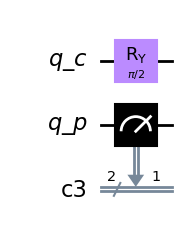

In [15]:
q1.draw('mpl')

In [16]:
sz = []

for i in range(50):
    sz.append(p0[i]-p1[i])  

$\textbf{sx}$

In [17]:
# we can make plots for different values of theta and fixed values of phi:
qasm_simulator = Aer.get_backend('qasm_simulator')
#we define empty lists to use them later to store the statistics of measuring values 00, 01, 10, 11 for different values of theta and phi
p0x = []
p1x = []


theta1 = np.pi/4
q_c = QuantumRegister(1,'q_{c}')
q_p = QuantumRegister(1,'q_{p}')
cr = ClassicalRegister(2)

for theta in s:
    q1 = QuantumCircuit(q_c,q_p,cr)
    q1.ry(2*theta1,q_c[0]) # symmetric beam-splitter
    #q1.cry(theta,q_c[0],q_p[0],ctrl_state = 0) # U operator for polarization
    q1.h(q_p[0]) # rotation to x basis
    #q1.measure(q_c[0],cr[0])
    q1.measure(q_p[0],cr[1])
    job = execute([q1 for i in range(20)],qasm_simulator,shots = 1000) #implement the simulation
    counts = job.result().get_counts()

    temp1 = [] #will store how many 00 values we have for each value of theta
    temp2 = [] #will store how many 01 values we have for each value of theta

    for i in range(20):
        temp1.append(counts[i].get('00',0)/1000) #stores how many (relative population) 00 values we have (50 times) for each value of theta 
        temp2.append(counts[i].get('10',1)/1000) #stores how many (relative population) 01 values we have (50 times) for each value of theta
        
    p0x.append(sum(temp1)/20) # takes the prob of 00 to occur for all the values of theta
    p1x.append(sum(temp2)/20) # takes the prob of 01 to occur for all the values of theta


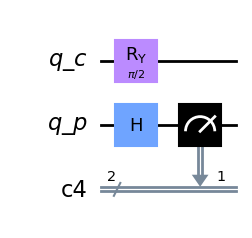

In [18]:
q1.draw('mpl')

In [19]:
sx = []

for i in range(50):
    sx.append(p0x[i]-p1x[i])  

$\textbf{sy}$

In [20]:
# we can make plots for different values of theta and fixed values of phi:
qasm_simulator = Aer.get_backend('qasm_simulator')
#we define empty lists to use them later to store the statistics of measuring values 00, 01, 10, 11 for different values of theta and phi
p0y = []
p1y = []


theta1 = np.pi/4
q_c = QuantumRegister(1,'q_{c}')
q_p = QuantumRegister(1,'q_{p}')
cr = ClassicalRegister(2)

for theta in s:
    q1 = QuantumCircuit(q_c,q_p,cr)
    q1.ry(2*theta1,q_c[0]) # symmetric beam-splitter
    #q1.cry(theta,q_c[0],q_p[0],ctrl_state = 0) # U operator for polarization
    q1.sdg(q_p[0]) #phase gate
    q1.h(q_p[0]) # rotation to y basis
    #q1.measure(q_c[0],cr[0])
    q1.measure(q_p[0],cr[1])
    job = execute([q1 for i in range(20)],qasm_simulator,shots = 1000) #implement the simulation
    counts = job.result().get_counts()

    temp1 = [] #will store how many 00 values we have for each value of theta
    temp2 = [] #will store how many 01 values we have for each value of theta

    for i in range(20):
        temp1.append(counts[i].get('00',0)/1000) #stores how many (relative population) 00 values we have (50 times) for each value of theta 
        temp2.append(counts[i].get('10',1)/1000) #stores how many (relative population) 01 values we have (50 times) for each value of theta
        
    p0y.append(sum(temp1)/20) # takes the prob of 00 to occur for all the values of theta
    p1y.append(sum(temp2)/20) # takes the prob of 01 to occur for all the values of theta


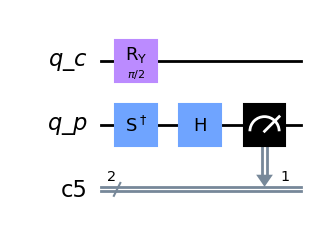

In [21]:
q1.draw('mpl')

In [22]:
sy = []

for i in range(50):
    sy.append(p0y[i]-p1y[i])  

In [23]:
rho_m = []

for i in range(50):
    s1 = np.add(I,sx[i]*x)
    s2 = np.add(sy[i]*y,sz[i]*z)
    s3 = np.add(s1,s2)
    rho_m.append(0.5*s3)

In [27]:
d = []
for i in range(50):
    d.append(((np.abs(rho_p[i] - rho_m[i])).trace()))

In [28]:
d

[0.0,
 0.003750000000000031,
 0.01789999999999997,
 0.03600000000000003,
 0.05690000000000012,
 0.09400000000000003,
 0.13710000000000022,
 0.17969999999999997,
 0.22790000000000016,
 0.2774000000000001,
 0.35050000000000014,
 0.41019999999999984,
 0.4678,
 0.5282,
 0.5946,
 0.6476000000000002,
 0.7157000000000002,
 0.7675000000000001,
 0.8264,
 0.8574000000000002,
 0.9209,
 0.9531999999999998,
 0.9783000000000002,
 0.9935999999999998,
 0.9905000000000004,
 0.9950000000000001,
 0.9972000000000003,
 1.0038,
 0.9753999999999999,
 0.9501,
 0.9028,
 0.8684000000000001,
 0.8192000000000002,
 0.7627000000000002,
 0.7088000000000001,
 0.6515,
 0.5974000000000004,
 0.5295000000000001,
 0.46400000000000013,
 0.39979999999999993,
 0.3391000000000001,
 0.2896,
 0.2345000000000001,
 0.1856,
 0.1341000000000001,
 0.0965000000000002,
 0.0651000000000001,
 0.03720000000000023,
 0.012600000000000278,
 0.0028499999999999637]

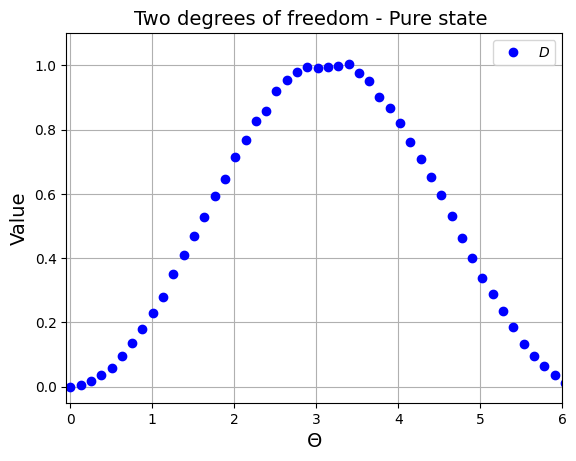

<Figure size 640x480 with 0 Axes>

In [29]:
# We can also visualize all the probabilities for all possible values of phi by plotting the probs p0 and p1
fig, ax = plt.subplots()

errorbar(s,d,fmt='b.',capsize=5,label=r"$D$",markersize=12)

ax.set_title('Two degrees of freedom - Pure state ', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\Theta$",size=14)
plt.ylabel("Value",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(-0.05, 1.1)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()

In [56]:
rho_m[20]

array([[ 9.995e-01+0.j    , -2.500e-03+0.0032j],
       [-2.500e-03-0.0032j,  5.000e-04+0.j    ]])

In [40]:
rho_md = []
for i in range(50):
    eigenvalues, eigenvectors = np.linalg.eig(rho_m[i])
    p_inv = np.linalg.inv(eigenvectors)
    rho_md.append(np.dot(p_inv,np.dot(rho_m[i],eigenvectors)))

In [43]:
rho_md[25]

array([[ 9.99517340e-01+0.00000000e+00j,  4.81516926e-20-9.26018770e-19j],
       [-2.09230197e-19-1.30104261e-18j,  4.82660461e-04-3.36662509e-22j]])

In [45]:
rho_pd = []
for i in range(50):
    eigenvalues, eigenvectors = np.linalg.eig(rho_p[i])
    p_inv = np.linalg.inv(eigenvectors)
    rho_pd.append(np.dot(p_inv,np.dot(rho_p[i],eigenvectors)))

In [46]:
rho_pd[25]

array([[ 5.03622499e-01+3.46944695e-18j, -2.70357639e-17-2.77555756e-17j],
       [ 2.38193445e-17+0.00000000e+00j,  4.96377501e-01+0.00000000e+00j]])

In [51]:
di = []
for i in range(50):
    di.append(((np.abs(rho_pd[i] - rho_md[i])).trace()))

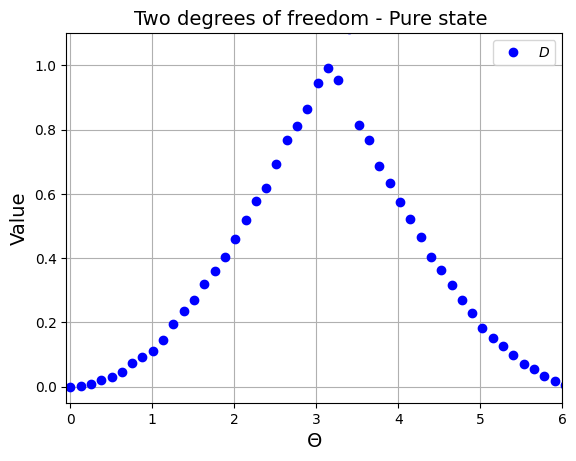

<Figure size 640x480 with 0 Axes>

In [52]:
# We can also visualize all the probabilities for all possible values of phi by plotting the probs p0 and p1
fig, ax = plt.subplots()

errorbar(s,di,fmt='b.',capsize=5,label=r"$D$",markersize=12)

ax.set_title('Two degrees of freedom - Pure state ', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\Theta$",size=14)
plt.ylabel("Value",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(-0.05, 1.1)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()